<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://raw.githubusercontent.com/Unidata/MetPy/master/src/metpy/plots/_static/unidata_150x150.png" alt="Unidata Logo" style="height: 98px;">
</div>

<h1>MetPy Skew-T</h1>
<h3>Unidata AMS 2021 Student Conference</h3>

<div style="clear:both"></div>
</div>

---

<div style="float:right; width:250 px"><img src="../../instructors/images/MetPy_SkewT_preview.png" alt="Skew-T plot with a hodograph inset." style="height: 300px;"></div>


### Focuses
* Read in sounding data from the University of Wyoming archive.
* Plot the data on a skew-T diagram using MetPy.
* Add a hodograph inset to the skew-T


### Objectives
1. [Access archived sounding data](#1.-Access-archived-sounding-data)
1. [Plot the Skew-T](#2.-Plot-the-Skew-T)
1. [Add a hodograph](#3.-Add-a-hodograph)

---

### Imports

In [26]:
from datetime import datetime

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from metpy.plots import SkewT, Hodograph
from metpy.units import pandas_dataframe_to_unit_arrays, units
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir
from metpy.calc import wind_speed

---

## 1. Access archived sounding data


The first step in plotting a skew-T is accessing the sounding data. We're going to download some observed sounding data from the University of Wyoming sounding archive from 00z on 15 April 2015 at Topeka, KS during a major tornado outbreak. First, we create a datetime object for MetPy to use to select the correct time and station from the Wyoming archive.

In [27]:
dt = datetime(2012, 4, 15, 0)
station = 'TOP'

Next, we'll download the data from the Wyoming archive into a Pandas dataframe with units. You'll need an internet connection for this step.

In [28]:
df = WyomingUpperAir.request_data(dt, station)
data = pandas_dataframe_to_unit_arrays(df)

Now we'll split that Pandas dataframe up into individual arrays for each variable with units, and calculate wind speed from the wind components.

In [29]:
p = data['pressure']
T = data['temperature']
Td = data['dewpoint']
u = data['u_wind']
v = data['v_wind']
spd = wind_speed(u,v)


<a href="#top">Top</a>

---

## 2. Plot the Skew-T

Now we'll plot the data we downloaded on a skew-T diagram.

The first two lines of code in this cell create a figure using Matplotlib and then modifies it into a skew-T plot
using MetPy's SkewT class.

The next three lines plot temperature and dewpoint data as red and green lines on the Skew-T, as well as plotting the wind data as barbs along the right side of the plot.

The two lines below that set the limits of the plot. These are set up to generally be good for most soundings,
but you may want to adjust them, especially if you are plotting particularly warm or cold profile.

The next three lines add dry adiabats, moist adiabats, and mixing lines to the plot.

Finally, the last three lines add a title to the plot and tell matplotlib to display it.

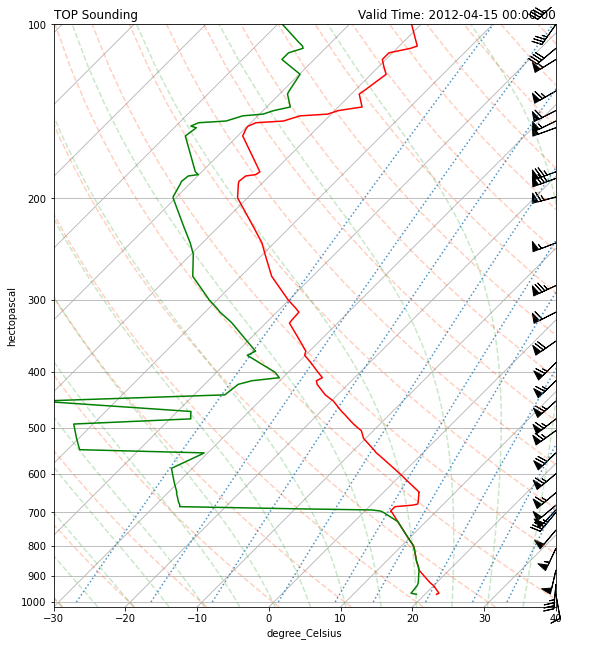

In [30]:
fig = plt.figure(figsize=(9, 11))
skew = SkewT(fig, rotation=45)

skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p[::3], u[::3], v[::3], y_clip_radius=0.03)

skew.ax.set_xlim(-30, 40)
skew.ax.set_ylim(1020, 100)

skew.plot_dry_adiabats(t0=np.arange(233, 533, 10) * units.K,
                       alpha=0.25, color='orangered')
skew.plot_moist_adiabats(t0=np.arange(233, 400, 5) * units.K,
                         alpha=0.25, color='tab:green')
skew.plot_mixing_lines(p=np.arange(1000, 99, -20) * units.hPa,
                       linestyle='dotted', color='tab:blue')

plt.title('{} Sounding'.format(station), loc='left')
plt.title('Valid Time: {}'.format(dt), loc='right')
plt.show()

<a href="#top">Top</a>

---

## 3. Add a hodograph

In this section, we'll add a hodograph inset to the plot.
Everything above the two commented lines is the same as the previous skew-T plot. The next two lines add a hodograph inset using matplotlib's inset_axes functionality and MetPy's Hodograph class.

The next line sets the range of the hodograph (from + to - 80 kt in this case).

Finally, the last two lines plot wind data below 150 hPa on the hodograph and color it by wind speed, and tell matplotlib to display the plot.

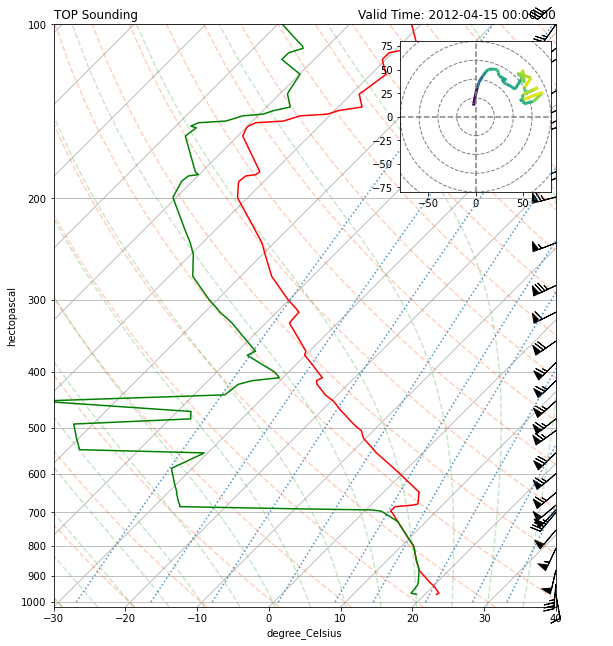

In [31]:
fig = plt.figure(figsize=(9, 11))
skew = SkewT(fig, rotation=45)
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p[::3], u[::3], v[::3], y_clip_radius=0.03)
skew.ax.set_xlim(-30, 40)
skew.ax.set_ylim(1020, 100)
skew.plot_dry_adiabats(t0=np.arange(233, 533, 10) * units.K,
                       alpha=0.25, color='orangered')
skew.plot_moist_adiabats(t0=np.arange(233, 400, 5) * units.K,
                         alpha=0.25, color='tab:green')
skew.plot_mixing_lines(p=np.arange(1000, 99, -20) * units.hPa,
                       linestyle='dotted', color='tab:blue')
plt.title('{} Sounding'.format(station), loc='left')
plt.title('Valid Time: {}'.format(dt), loc='right')
#########################################################
#########################################################

ax_hod = inset_axes(skew.ax, '30%', '30%', loc=1)
h = Hodograph(ax_hod, component_range=80)

h.add_grid(increment=20)

h.plot_colormapped(u[p>150*units('hPa')], v[p>150*units('hPa')], spd[p>150*units('hPa')])
plt.show()

<a href="#top">Top</a>

---

## See also

Documentation for:

* [metpy.plots.SkewT](https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.SkewT.html#metpy.plots.SkewT)
* [metpy.plots.Hodograph](https://unidata.github.io/MetPy/latest/api/generated/metpy.plots.Hodograph.html#metpy.plots.Hodograph)

## Other Notebooks

* [A more detailed introduction to plotting Skew-Ts](https://unidata.github.io/python-training/workshop/Skew_T/skewt-and-hodograph/)
* [MetPy Mondays Skew-T Example Video](https://www.unidata.ucar.edu/blogs/developer/en/entry/metpy-mondays-making-a-basic)


<a href="#top">Top</a>

---